<a href="https://colab.research.google.com/github/aaril011/Praktikum-MachineLearning/blob/main/Percobaan2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, feature

In [44]:
img = cv2.imread('/content/Fuji_apple.jpg')
image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

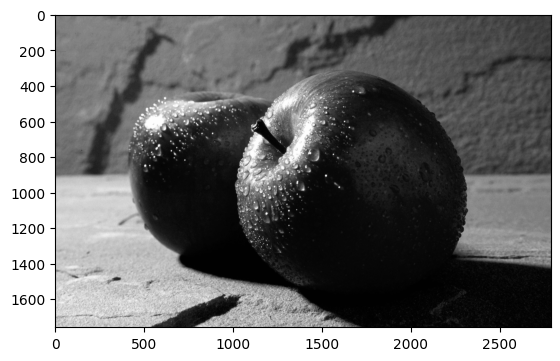

In [45]:
plt.imshow(image, cmap='gray')
plt.show()

In [46]:
image

array([[121, 122, 121, ...,  58,  58,  60],
       [121, 121, 120, ...,  59,  59,  61],
       [121, 120, 120, ...,  62,  62,  63],
       ...,
       [204, 210, 211, ...,   2,   2,   2],
       [210, 215, 216, ...,   2,   2,   2],
       [214, 220, 222, ...,   2,   2,   2]], dtype=uint8)

In [47]:
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

In [48]:
glcm = feature.greycomatrix(image, distances=distances, angles=angles, levels=256, symmetric = True, normed=True)
contrast = feature.greycoprops(glcm, 'contrast')
homogeneity = feature.greycoprops(glcm, 'homogeneity')
energy = feature.greycoprops(glcm, 'energy')
correlation = feature.greycoprops(glcm, 'correlation')

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [49]:
print('Contrast: ', contrast)
print('Homogeneity: ', homogeneity)
print('Energy: ', energy)
print('Correlation: ', correlation)

Contrast:  [[ 30.01921983  49.71979663  20.83283864  42.71374799]
 [ 82.91773026  49.71979663  66.19156032  42.71374799]
 [133.4277631  130.32667583 120.8717383  112.30061719]]
Homogeneity:  [[0.39565706 0.33767246 0.45210229 0.34426018]
 [0.29526368 0.33767246 0.32383952 0.34426018]
 [0.27164363 0.26340924 0.27887784 0.27041449]]
Energy:  [[0.04449645 0.04045611 0.04702793 0.0405095 ]
 [0.0382172  0.04045611 0.03955297 0.0405095 ]
 [0.03640263 0.03584326 0.03684021 0.03587026]]
Correlation:  [[0.99667154 0.99448721 0.9976902  0.99526402]
 [0.99080595 0.99448721 0.99266115 0.99526402]
 [0.98520477 0.98554923 0.9865987  0.98754799]]


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
komentar = [
    "Pengiriman cepat, kualitas produk baik, penjual ramah",
    "Produk tidak sesuai gambar, tapi memang sesuai harga",
    "penjual responsif dan ramah, produk berfungsi dengan baik",
    "Lumayan untuk harga segini sudah dapat produk bagus",
    "Tidak sesuai ekspektasi, produk berbeda dengan gambar",
]

In [55]:
vectorizer = TfidfVectorizer()

In [56]:
tfidf_matrix = vectorizer.fit_transform(komentar)

In [57]:
print(vectorizer.get_feature_names_out())

['bagus' 'baik' 'berbeda' 'berfungsi' 'cepat' 'dan' 'dapat' 'dengan'
 'ekspektasi' 'gambar' 'harga' 'kualitas' 'lumayan' 'memang' 'pengiriman'
 'penjual' 'produk' 'ramah' 'responsif' 'segini' 'sesuai' 'sudah' 'tapi'
 'tidak' 'untuk']


In [58]:
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'pengiriman': 14, 'cepat': 4, 'kualitas': 11, 'produk': 16, 'baik': 1, 'penjual': 15, 'ramah': 17, 'tidak': 23, 'sesuai': 20, 'gambar': 9, 'tapi': 22, 'memang': 13, 'harga': 10, 'responsif': 18, 'dan': 5, 'berfungsi': 3, 'dengan': 7, 'lumayan': 12, 'untuk': 24, 'segini': 19, 'sudah': 21, 'dapat': 6, 'bagus': 0, 'ekspektasi': 8, 'berbeda': 2}


In [59]:
print(tfidf_matrix)

  (0, 17)	0.354491454113195
  (0, 15)	0.354491454113195
  (0, 1)	0.354491454113195
  (0, 16)	0.20936836335513379
  (0, 11)	0.4393830201954138
  (0, 4)	0.4393830201954138
  (0, 14)	0.4393830201954138
  (1, 10)	0.3097679976786992
  (1, 13)	0.38394944871221537
  (1, 22)	0.38394944871221537
  (1, 9)	0.3097679976786992
  (1, 20)	0.6195359953573985
  (1, 23)	0.3097679976786992
  (1, 16)	0.18295396952806844
  (2, 7)	0.33411913201775406
  (2, 3)	0.4141320520639498
  (2, 5)	0.4141320520639498
  (2, 18)	0.4141320520639498
  (2, 17)	0.33411913201775406
  (2, 15)	0.33411913201775406
  (2, 1)	0.33411913201775406
  (2, 16)	0.1973361417447812
  (3, 0)	0.3813025879625254
  (3, 6)	0.3813025879625254
  (3, 21)	0.3813025879625254
  (3, 19)	0.3813025879625254
  (3, 24)	0.3813025879625254
  (3, 12)	0.3813025879625254
  (3, 10)	0.30763252709183986
  (3, 16)	0.18169272619885407
  (4, 2)	0.4549817658305219
  (4, 8)	0.4549817658305219
  (4, 7)	0.36707642387391093
  (4, 9)	0.36707642387391093
  (4, 20)	0.367076

In [60]:
print(tfidf_matrix.toarray())

[[0.         0.35449145 0.         0.         0.43938302 0.
  0.         0.         0.         0.         0.         0.43938302
  0.         0.         0.43938302 0.35449145 0.20936836 0.35449145
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.309768   0.309768   0.
  0.         0.38394945 0.         0.         0.18295397 0.
  0.         0.         0.619536   0.         0.38394945 0.309768
  0.        ]
 [0.         0.33411913 0.         0.41413205 0.         0.41413205
  0.         0.33411913 0.         0.         0.         0.
  0.         0.         0.         0.33411913 0.19733614 0.33411913
  0.41413205 0.         0.         0.         0.         0.
  0.        ]
 [0.38130259 0.         0.         0.         0.         0.
  0.38130259 0.         0.         0.         0.30763253 0.
  0.38130259 0.         0.         0.         0.18169273 0.
  0.         0.38130